___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course.

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study####

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters*

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annual income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given.

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Rename columns 
new_column_names = {
    'CustomerID': 'customer_id',
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
}

df.rename(columns=new_column_names, inplace=True)
df.head()


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# Check against duplicated rows

df.drop_duplicates(inplace=True)
df.shape

(200, 5)

In [8]:
# check if there is any duplicated customer_id

duplicated_rows = df[df.duplicated(subset=['customer_id'], keep=False)]
print(duplicated_rows)

# Empty DataFrame indicates no customer_id is duplicated

Empty DataFrame
Columns: [customer_id, gender, age, annual_income, spending_score]
Index: []


In [9]:
for col in df.columns:
    print("Column", col, "has", df[col].nunique(), "unique values")

Column customer_id has 200 unique values
Column gender has 2 unique values
Column age has 51 unique values
Column annual_income has 64 unique values
Column spending_score has 84 unique values


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [10]:
df = df.drop(columns=['customer_id', 'gender'])

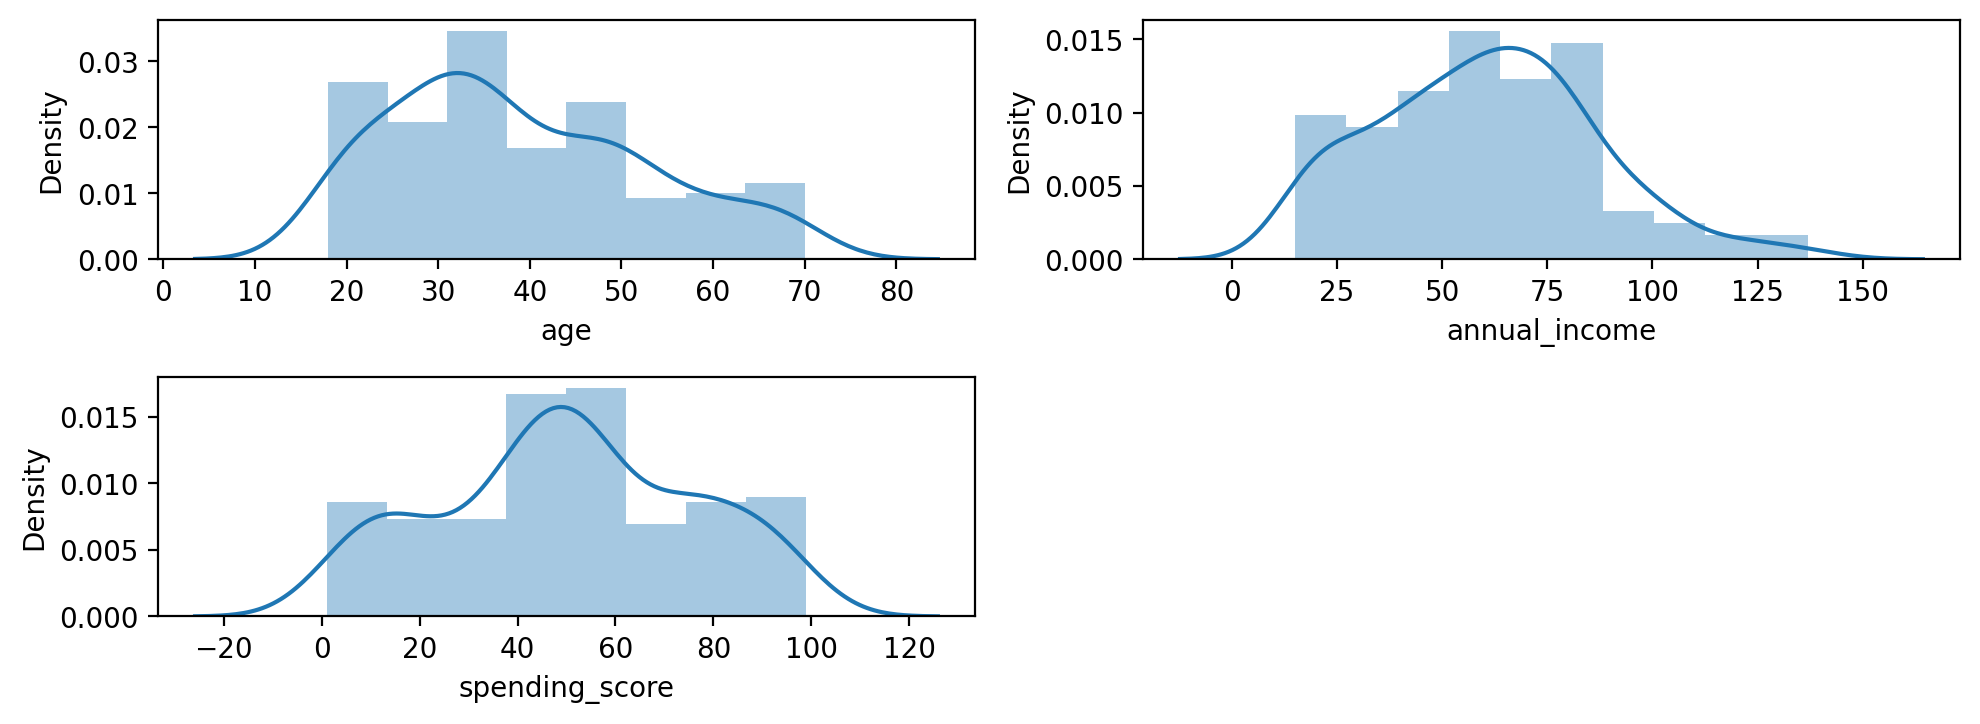

In [11]:
# Distribution of the numericalfeatures

fig = plt.figure(figsize=(10,14), dpi=200)
for i, col in enumerate(df.columns):
        plt.subplot(8,2,i+1)
        sns.distplot(df[col],)
plt.tight_layout();


<Axes: >

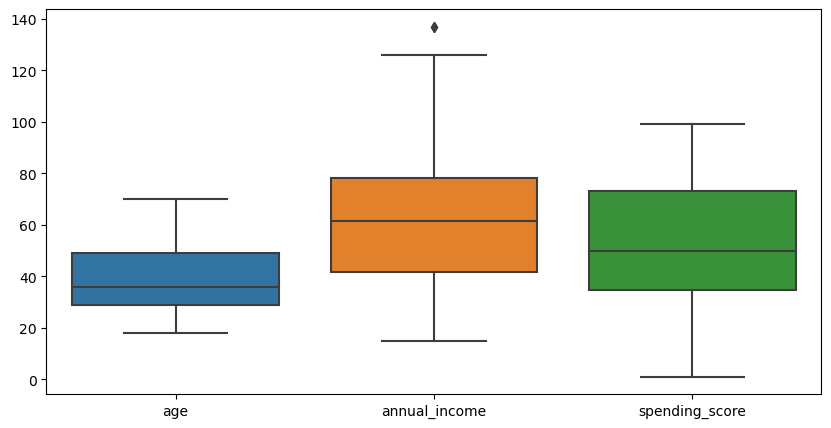

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df)

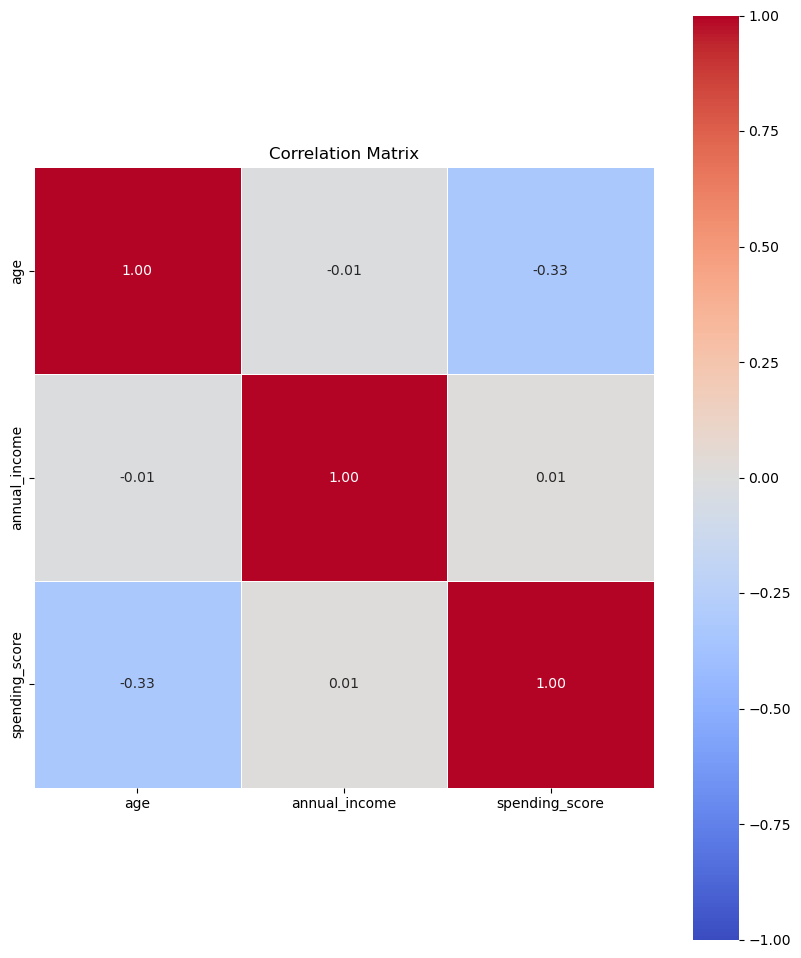

In [13]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 12))
sns.heatmap(corr_matrix,square=True, annot=True, fmt=".2f", annot_kws={"size": 10}, linewidths=.5, vmin=-1, vmax=1, cmap='coolwarm')
plt.title("Correlation Matrix")

plt.show()

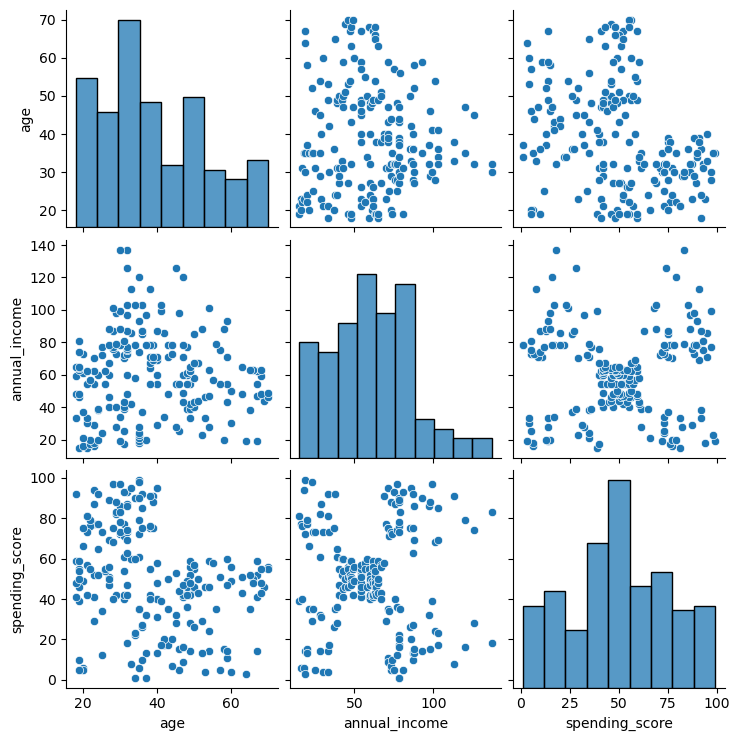

In [14]:
sns.pairplot(df)
plt.show()

---
---

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example:

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [15]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [16]:
X1 = df.drop(columns = ['annual_income'])
X1

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [17]:
# We have imported StandardScaler and MinMaxScaler.
# Because age and spending_score are on different scales, I will standardize both features.

scaler = MinMaxScaler()
X1_scaled = scaler.fit_transform(X1)

#### *ii. Determine optimal number of clusters*

### Step - 1 Hopkins Test
Here I use Hopkins Test to assess the clustering tendency of the data. 

In [18]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [19]:
X1_scaled.shape

(200, 2)

In [20]:
hopkins(X1_scaled, 0.05)
# each time we run the function, we obtain a different score because the function selects a different subsample

0.7253466575037899

In [21]:
hopkins(X1_scaled, 1)
# this uses the full data 

0.6814961419724316

### Step - 2 Choose optimal number of clusters
Now that I have assessed the clustering tendency using Hopkins Test, I identify the optimal number of clusters using elbow method. I will use two criteria : inertia-error and distortion.


In [22]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X1_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

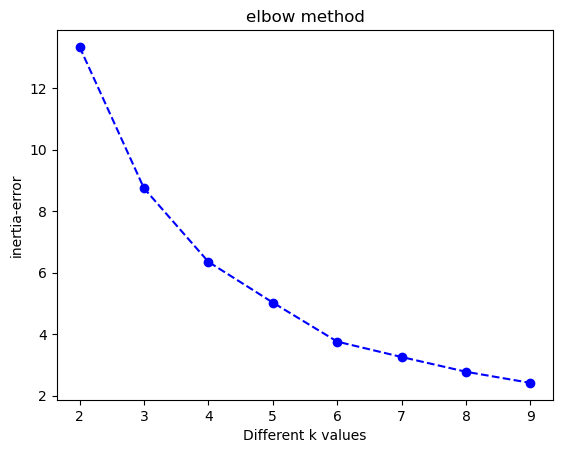

In [23]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [24]:
ssd # sum of squared distance

# the first ssd score corresponds to 2 cluster solution, the second to 3 clusters, and so on.

[13.337690580804235,
 8.742042168276534,
 6.350049379567737,
 5.026143351352524,
 3.756144533763224,
 3.2553107976472497,
 2.77563830262936,
 2.413130402791132]

In [25]:
-pd.Series(ssd).diff()

0         NaN
1    4.595648
2    2.391993
3    1.323906
4    1.269999
5    0.500834
6    0.479672
7    0.362508
dtype: float64

In [26]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X1_scaled)
    distances = kmeanModel.transform(X1_scaled) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

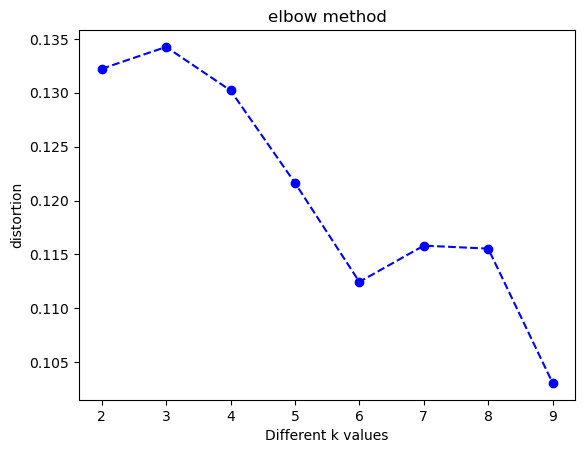

In [27]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### Step - 3 Silhoutte Analysis

In [28]:
from sklearn.metrics import silhouette_score
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [29]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X1_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.47252865228696783
For n_clusters=3, the silhouette score is 0.44058221683010546
For n_clusters=4, the silhouette score is 0.4359241957977821
For n_clusters=5, the silhouette score is 0.44625330587100703
For n_clusters=6, the silhouette score is 0.4554676382159921
For n_clusters=7, the silhouette score is 0.4097179595231675
For n_clusters=8, the silhouette score is 0.40386586157610954


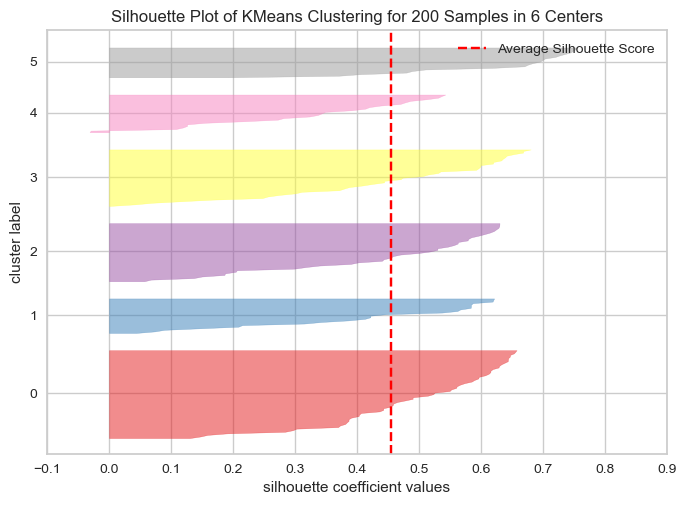

In [30]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model6 = KMeans(n_clusters=6,
                random_state=42)          # we decided n_clusters=6!
visualizer = SilhouetteVisualizer(model6)

visualizer.fit(X1_scaled)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [31]:
model6.labels_

array([2, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 2, 1, 0, 4, 0,
       1, 0, 1, 0, 3, 2, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 5, 0, 3, 2,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 5, 3, 3, 3, 5, 2, 3, 5, 2, 5, 3, 5, 2,
       3, 5, 2, 2, 5, 3, 5, 5, 5, 2, 3, 3, 2, 3, 5, 3, 5, 3, 2, 3, 3, 2,
       2, 3, 5, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 5, 2, 3, 2, 5, 3, 5, 5,
       5, 2, 3, 2, 2, 2, 5, 3, 3, 3, 2, 3, 3, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       2, 0, 4, 0, 1, 0, 4, 0, 1, 0, 2, 0, 4, 0, 3, 0, 4, 0, 4, 0, 1, 0,
       1, 0, 4, 0, 4, 0, 3, 0, 4, 0, 1, 0, 4, 0, 4, 2, 4, 0, 4, 0, 1, 0,
       1, 0, 1, 0, 4, 0, 1, 0, 3, 0, 1, 0, 4, 0, 4, 0, 4, 0, 1, 0, 3, 0,
       4, 0])

In [32]:
## Let's see the average silhoutte scores for each of the six classes:
for i in range(6):
    label = (model6.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.4925708401930113
mean silhouette score for label 1    : 0.4080241602222709
mean silhouette score for label 2    : 0.44291062040108653
mean silhouette score for label 3    : 0.44628418055751123
mean silhouette score for label 4    : 0.31656198773535
mean silhouette score for label 5    : 0.6187633058915807
mean silhouette score for all labels : 0.4554676382159921


#### *iii. Apply K Means*

In [33]:
model = KMeans(n_clusters = 6, random_state=42)
model.fit_predict(X1_scaled)

array([2, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 2, 1, 0, 4, 0,
       1, 0, 1, 0, 3, 2, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 5, 0, 3, 2,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 5, 3, 3, 3, 5, 2, 3, 5, 2, 5, 3, 5, 2,
       3, 5, 2, 2, 5, 3, 5, 5, 5, 2, 3, 3, 2, 3, 5, 3, 5, 3, 2, 3, 3, 2,
       2, 3, 5, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 5, 2, 3, 2, 5, 3, 5, 5,
       5, 2, 3, 2, 2, 2, 5, 3, 3, 3, 2, 3, 3, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       2, 0, 4, 0, 1, 0, 4, 0, 1, 0, 2, 0, 4, 0, 3, 0, 4, 0, 4, 0, 1, 0,
       1, 0, 4, 0, 4, 0, 3, 0, 4, 0, 1, 0, 4, 0, 4, 2, 4, 0, 4, 0, 1, 0,
       1, 0, 1, 0, 4, 0, 1, 0, 3, 0, 1, 0, 4, 0, 4, 0, 4, 0, 1, 0, 3, 0,
       4, 0])

In [34]:
model.labels_

array([2, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 2, 1, 0, 4, 0,
       1, 0, 1, 0, 3, 2, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 5, 0, 3, 2,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 5, 3, 3, 3, 5, 2, 3, 5, 2, 5, 3, 5, 2,
       3, 5, 2, 2, 5, 3, 5, 5, 5, 2, 3, 3, 2, 3, 5, 3, 5, 3, 2, 3, 3, 2,
       2, 3, 5, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 5, 2, 3, 2, 5, 3, 5, 5,
       5, 2, 3, 2, 2, 2, 5, 3, 3, 3, 2, 3, 3, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       2, 0, 4, 0, 1, 0, 4, 0, 1, 0, 2, 0, 4, 0, 3, 0, 4, 0, 4, 0, 1, 0,
       1, 0, 4, 0, 4, 0, 3, 0, 4, 0, 1, 0, 4, 0, 4, 2, 4, 0, 4, 0, 1, 0,
       1, 0, 1, 0, 4, 0, 1, 0, 3, 0, 1, 0, 4, 0, 4, 0, 4, 0, 1, 0, 3, 0,
       4, 0])

In [35]:
clusters = model.labels_

In [36]:
X1.head()

,age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [37]:
X1["predicted_clusters"] = clusters

In [38]:
X1

,age,spending_score,predicted_clusters
0,19,39,2
1,21,81,0
2,20,6,4
3,23,77,0
4,31,40,2
...,...,...,...
195,35,79,0
196,45,28,3
197,32,74,0
198,32,18,4


#### *iv. Visualizing and Labeling All the Clusters*

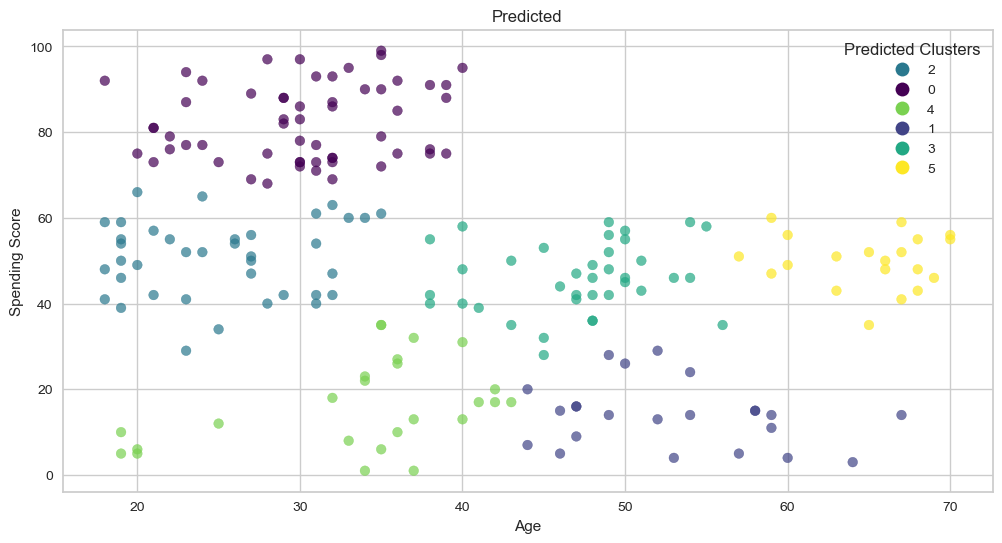

In [39]:
from matplotlib.lines import Line2D

plt.figure(figsize = (12,6))

scatter = plt.scatter(X1["age"],
            X1["spending_score"],
            c=X1.predicted_clusters,
            cmap="viridis",
            alpha=0.7)


# Extract unique cluster labels
unique_labels = X1.predicted_clusters.unique()

# Create legend handles and labels
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(label), markersize=10) for label in unique_labels]
labels = [str(label) for label in unique_labels]

# Add a legend with the cluster labels
plt.legend(handles, labels, title="Predicted Clusters")

# Add axis labels
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.title("Predicted")
plt.show()

In [40]:
X1.groupby('predicted_clusters')[['age', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('age', 'mean'), ascending=True)


age         spending_score        
                         mean min max           mean min max
predicted_clusters                                          
2                   25.078947  18  35      50.473684  29  66
0                   30.175439  18  40      82.350877  68  99
4                   33.680000  19  43      16.400000   1  35
3                   47.081081  38  56      45.945946  28  59
1                   52.869565  44  67      13.956522   3  29
5                   64.850000  57  70      49.850000  35  60

#### *iii. Apply K Means*

In [41]:
model = KMeans(n_clusters = 6, random_state=42)
model.fit_predict(X1_scaled)

array([2, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 2, 1, 0, 4, 0,
       1, 0, 1, 0, 3, 2, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 5, 0, 3, 2,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 5, 3, 3, 3, 5, 2, 3, 5, 2, 5, 3, 5, 2,
       3, 5, 2, 2, 5, 3, 5, 5, 5, 2, 3, 3, 2, 3, 5, 3, 5, 3, 2, 3, 3, 2,
       2, 3, 5, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 5, 2, 3, 2, 5, 3, 5, 5,
       5, 2, 3, 2, 2, 2, 5, 3, 3, 3, 2, 3, 3, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       2, 0, 4, 0, 1, 0, 4, 0, 1, 0, 2, 0, 4, 0, 3, 0, 4, 0, 4, 0, 1, 0,
       1, 0, 4, 0, 4, 0, 3, 0, 4, 0, 1, 0, 4, 0, 4, 2, 4, 0, 4, 0, 1, 0,
       1, 0, 1, 0, 4, 0, 1, 0, 3, 0, 1, 0, 4, 0, 4, 0, 4, 0, 1, 0, 3, 0,
       4, 0])

In [42]:
model.labels_

array([2, 0, 4, 0, 2, 0, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 2, 1, 0, 4, 0,
       1, 0, 1, 0, 3, 2, 4, 0, 1, 0, 1, 0, 1, 0, 4, 0, 4, 0, 5, 0, 3, 2,
       1, 2, 3, 2, 2, 2, 3, 2, 2, 5, 3, 3, 3, 5, 2, 3, 5, 2, 5, 3, 5, 2,
       3, 5, 2, 2, 5, 3, 5, 5, 5, 2, 3, 3, 2, 3, 5, 3, 5, 3, 2, 3, 3, 2,
       2, 3, 5, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 3, 5, 2, 3, 2, 5, 3, 5, 5,
       5, 2, 3, 2, 2, 2, 5, 3, 3, 3, 2, 3, 3, 0, 2, 0, 3, 0, 1, 0, 1, 0,
       2, 0, 4, 0, 1, 0, 4, 0, 1, 0, 2, 0, 4, 0, 3, 0, 4, 0, 4, 0, 1, 0,
       1, 0, 4, 0, 4, 0, 3, 0, 4, 0, 1, 0, 4, 0, 4, 2, 4, 0, 4, 0, 1, 0,
       1, 0, 1, 0, 4, 0, 1, 0, 3, 0, 1, 0, 4, 0, 4, 0, 4, 0, 1, 0, 3, 0,
       4, 0])

In [43]:
clusters = model.labels_

In [44]:
X1.head()

,age,spending_score,predicted_clusters
0,19,39,2
1,21,81,0
2,20,6,4
3,23,77,0
4,31,40,2


In [45]:
X1["predicted_clusters"] = clusters

In [46]:
X1

,age,spending_score,predicted_clusters
0,19,39,2
1,21,81,0
2,20,6,4
3,23,77,0
4,31,40,2
...,...,...,...
195,35,79,0
196,45,28,3
197,32,74,0
198,32,18,4


In [47]:
X1.groupby('predicted_clusters')[['age', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('age', 'mean'), ascending=True)


age         spending_score        
                         mean min max           mean min max
predicted_clusters                                          
2                   25.078947  18  35      50.473684  29  66
0                   30.175439  18  40      82.350877  68  99
4                   33.680000  19  43      16.400000   1  35
3                   47.081081  38  56      45.945946  28  59
1                   52.869565  44  67      13.956522   3  29
5                   64.850000  57  70      49.850000  35  60

#### *iv. Visualizing and Labeling All the Clusters*

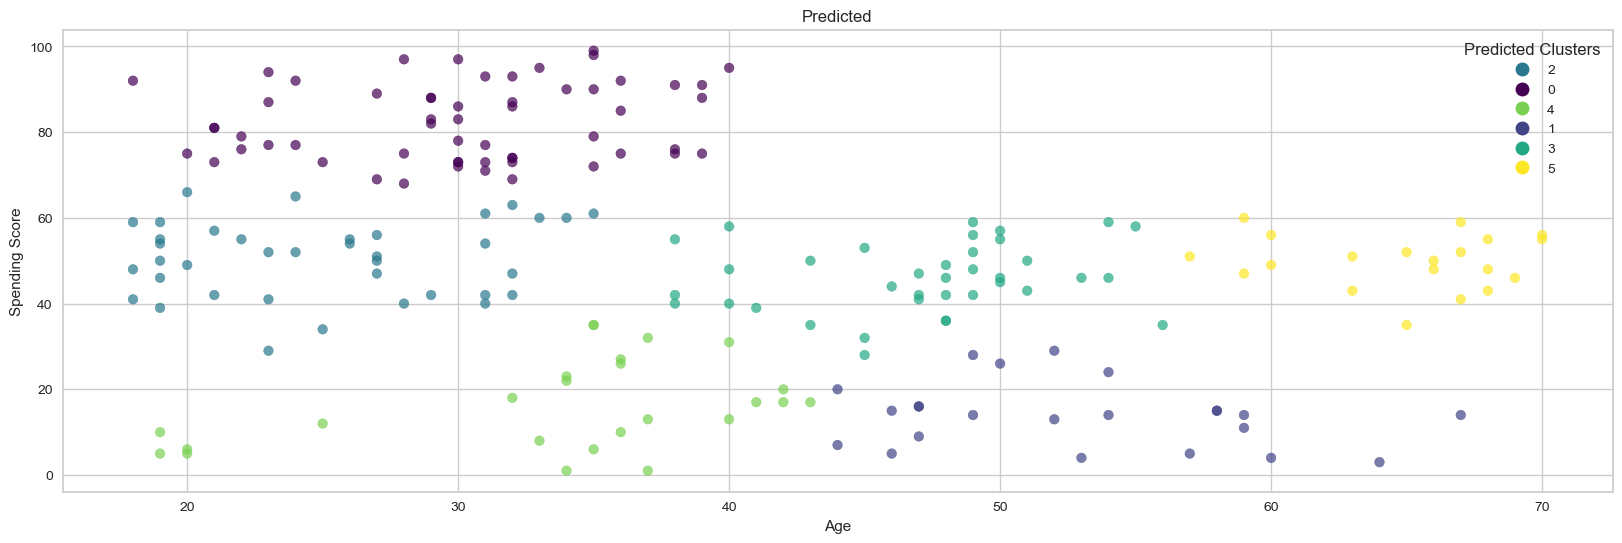

In [48]:
from matplotlib.lines import Line2D

plt.figure(figsize = (20,6))

scatter = plt.scatter(X1["age"],
            X1["spending_score"],
            c=X1.predicted_clusters,
            cmap="viridis",
            alpha=0.7)


# Extract unique cluster labels
unique_labels = X1.predicted_clusters.unique()

# Create legend handles and labels
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(label), markersize=10) for label in unique_labels]
labels = [str(label) for label in unique_labels]

# Add a legend with the cluster labels
plt.legend(handles, labels, title="Predicted Clusters")

# Add axis labels
plt.xlabel("Age")
plt.ylabel("Spending Score")

plt.title("Predicted")
plt.show()

In [49]:
X1.groupby('predicted_clusters')[['age', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('age', 'mean'), ascending=True)

age         spending_score        
                         mean min max           mean min max
predicted_clusters                                          
2                   25.078947  18  35      50.473684  29  66
0                   30.175439  18  40      82.350877  68  99
4                   33.680000  19  43      16.400000   1  35
3                   47.081081  38  56      45.945946  28  59
1                   52.869565  44  67      13.956522   3  29
5                   64.850000  57  70      49.850000  35  60

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [50]:
X2 = df.drop(columns = ['age'])
X2

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [51]:
# We have imported StandardScaler and MinMaxScaler.
# Because age and spending_score are on different scales, I will standardize both features.

scaler = MinMaxScaler()
X2_scaled = scaler.fit_transform(X2)

#### *ii. Determine optimal number of clusters*

### Step - 1 Hopkins Test
Here I use Hopkins Test to assess the clustering tendency of the data. 

In [52]:
X2_scaled.shape

(200, 2)

In [53]:
# Note that we have already defined our function and it is ready for use

hopkins(X2_scaled, 0.05)
# each time we run the function, we obtain a different score because the function selects a different subsample each time

0.6778368878162195

In [54]:
hopkins(X2_scaled, 1)
# this uses the full data 

0.6933940730202668

### Step - 2 Choose optimal number of clusters
Now that I have assessed the clustering tendency using Hopkins Test, I identify the optimal number of clusters using elbow method. I will use two criteria : inertia-error and distortion.


In [55]:
from sklearn.cluster import KMeans

ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k,
                   random_state=42)
    model.fit(X2_scaled)
    ssd.append(model.inertia_)

Text(0.5, 1.0, 'elbow method')

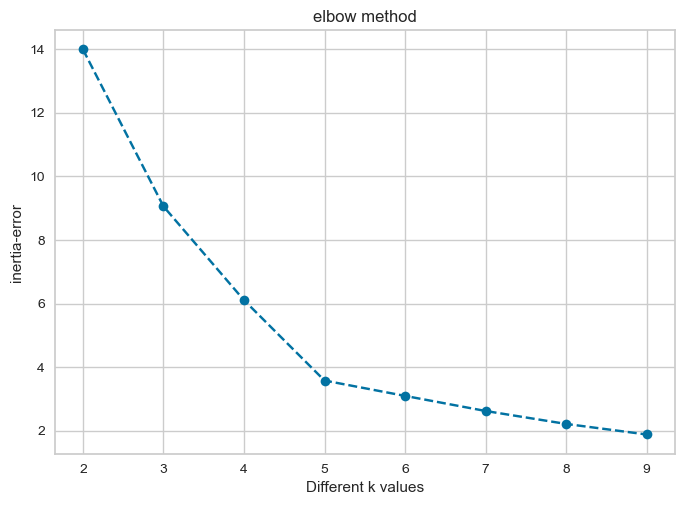

In [56]:
plt.plot(K, ssd, "bo--")
plt.xlabel("Different k values")
plt.ylabel("inertia-error")
plt.title("elbow method")

In [57]:
ssd # sum of squared distance

[13.993505283127977,
 9.058985215159453,
 6.110312266413656,
 3.5831179059525606,
 3.1003435707513747,
 2.62606237726551,
 2.2188402609846714,
 1.8872721883620915]

In [58]:
-pd.Series(ssd).diff()

0         NaN
1    4.934520
2    2.948673
3    2.527194
4    0.482774
5    0.474281
6    0.407222
7    0.331568
dtype: float64

In [59]:
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X2_scaled)
    distances = kmeanModel.transform(X2_scaled) # distances from each observation to each cluster centroid
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[labels == i, i] # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances ** 2)) # calculate the mean of squared distances from observations in each cluster to their own centroid and add it to the result list
    distortion.append(sum(result)) # sum the means of all clusters and add it to the distortion list

Text(0.5, 1.0, 'elbow method')

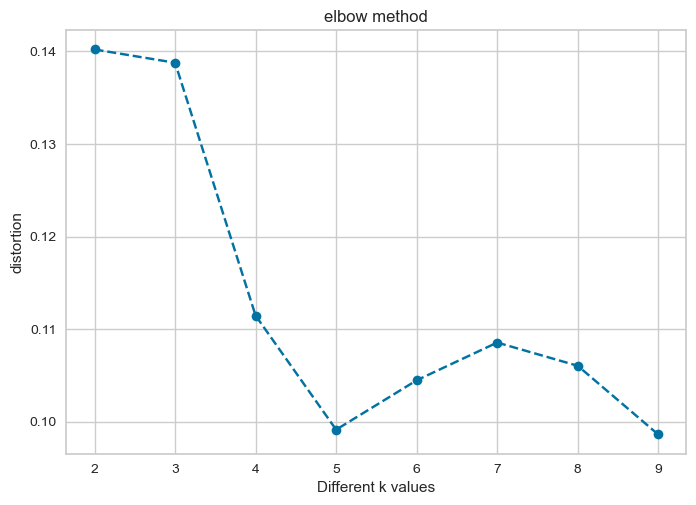

In [60]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("elbow method")

### Silhoutte Analysis

In [61]:
from sklearn.metrics import silhouette_score
# silhouette_score ; It is a metric that measures the quality of our clustering.
# When calculating, both inter cluster distance and intra cluster distance are taken into account.
# ranges -1 to 1, bad to good respectively.

In [62]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters,
                    random_state=42)
    kmeans.fit(X2_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.33340205479521
For n_clusters=3, the silhouette score is 0.4514909309424474
For n_clusters=4, the silhouette score is 0.49620078745146784
For n_clusters=5, the silhouette score is 0.5594854531227246
For n_clusters=6, the silhouette score is 0.535817696916733
For n_clusters=7, the silhouette score is 0.5168021892187427
For n_clusters=8, the silhouette score is 0.42983975856498574


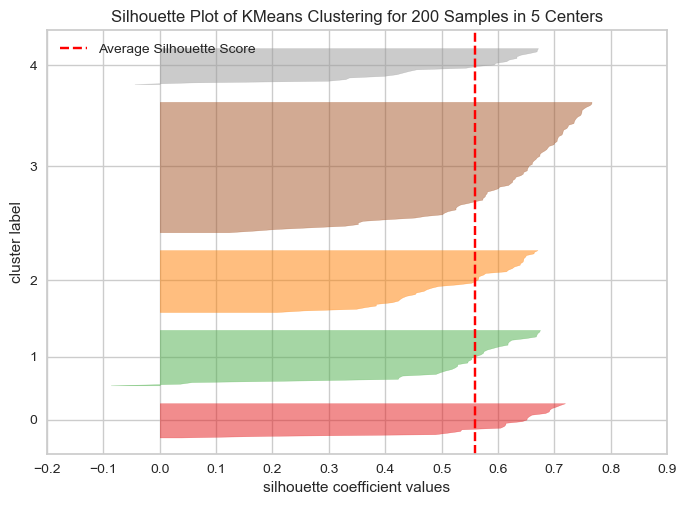

In [63]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model5 = KMeans(n_clusters=5,
                random_state=42)          # we decided n_clusters=5!
visualizer = SilhouetteVisualizer(model5)

visualizer.fit(X2_scaled)    # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [64]:
model5.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [65]:
## Let's see the average silhoutte scores for each of the five classes:
for i in range(5):
    label = (model5.labels_== i)
    print(f"mean silhouette score for label {i:<4} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0    : 0.585932908834499
mean silhouette score for label 1    : 0.5100676264333632
mean silhouette score for label 2    : 0.522360965108495
mean silhouette score for label 3    : 0.6119010983052857
mean silhouette score for label 4    : 0.4877449175242944
mean silhouette score for all labels : 0.5594854531227246


#### *iii. Apply K Means*

In [66]:
model = KMeans(n_clusters = 5, random_state=42)
model.fit_predict(X2_scaled)

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [67]:
model.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 3,
       4, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 1, 2, 3, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [68]:
clusters = model.labels_

In [69]:
X2.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [70]:
X2["predicted_clusters"] = clusters

In [71]:
X2

,annual_income,spending_score,predicted_clusters
0,15,39,4
1,15,81,0
2,16,6,4
3,16,77,0
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,1
197,126,74,2
198,137,18,1


In [72]:
X2.groupby('predicted_clusters')[['annual_income', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('annual_income', 'mean'), ascending=True)


annual_income          spending_score        
                            mean min  max           mean min max
predicted_clusters                                              
0                      25.727273  15   39      79.363636  61  99
4                      26.304348  15   39      20.913043   3  40
3                      55.296296  39   76      49.518519  34  61
2                      86.538462  69  137      82.128205  63  97
1                      88.200000  70  137      17.114286   1  39

#### *iv. Visualizing and Labeling All the Clusters*

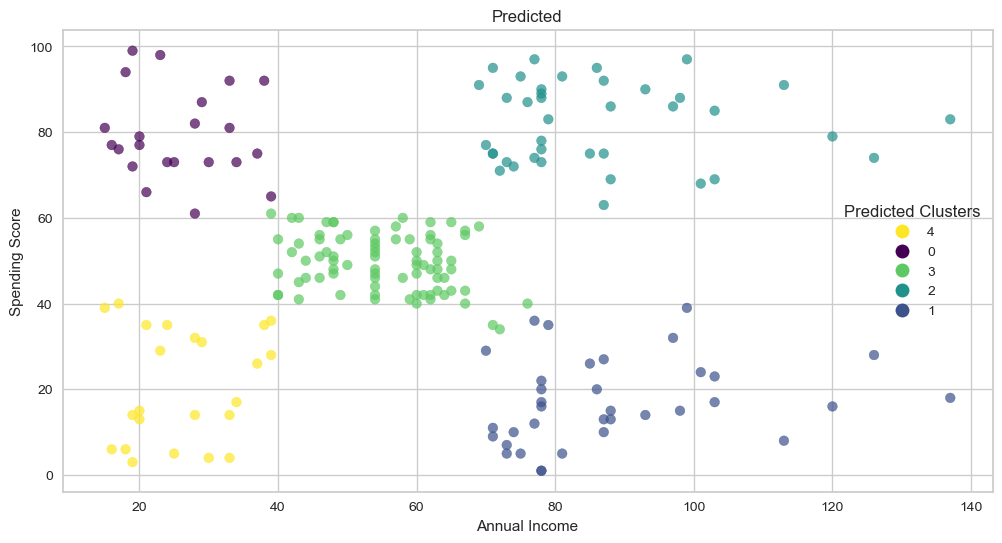

In [73]:
from matplotlib.lines import Line2D

plt.figure(figsize = (12,6))

scatter = plt.scatter(X2["annual_income"],
            X2["spending_score"],
            c=X2.predicted_clusters,
            cmap="viridis",
            alpha=0.7)


# Extract unique cluster labels
unique_labels = X2.predicted_clusters.unique()

# Create legend handles and labels
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.to_rgba(label), markersize=10) for label in unique_labels]
labels = [str(label) for label in unique_labels]

# Add a legend with the cluster labels
plt.legend(handles, labels, title="Predicted Clusters")

# Add axis labels
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

plt.title("Predicted")
plt.show()

In [74]:
X2.groupby('predicted_clusters')[['annual_income', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('annual_income', 'mean'), ascending=True)


annual_income          spending_score        
                            mean min  max           mean min max
predicted_clusters                                              
0                      25.727273  15   39      79.363636  61  99
4                      26.304348  15   39      20.913043   3  40
3                      55.296296  39   76      49.518519  34  61
2                      86.538462  69  137      82.128205  63  97
1                      88.200000  70  137      17.114286   1  39

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [76]:
hc_ward = linkage(y=X1_scaled, method="ward")
hc_complete = linkage(X1_scaled, "complete")
hc_average = linkage(X1_scaled, "average")
hc_single = linkage(X1_scaled, "single")

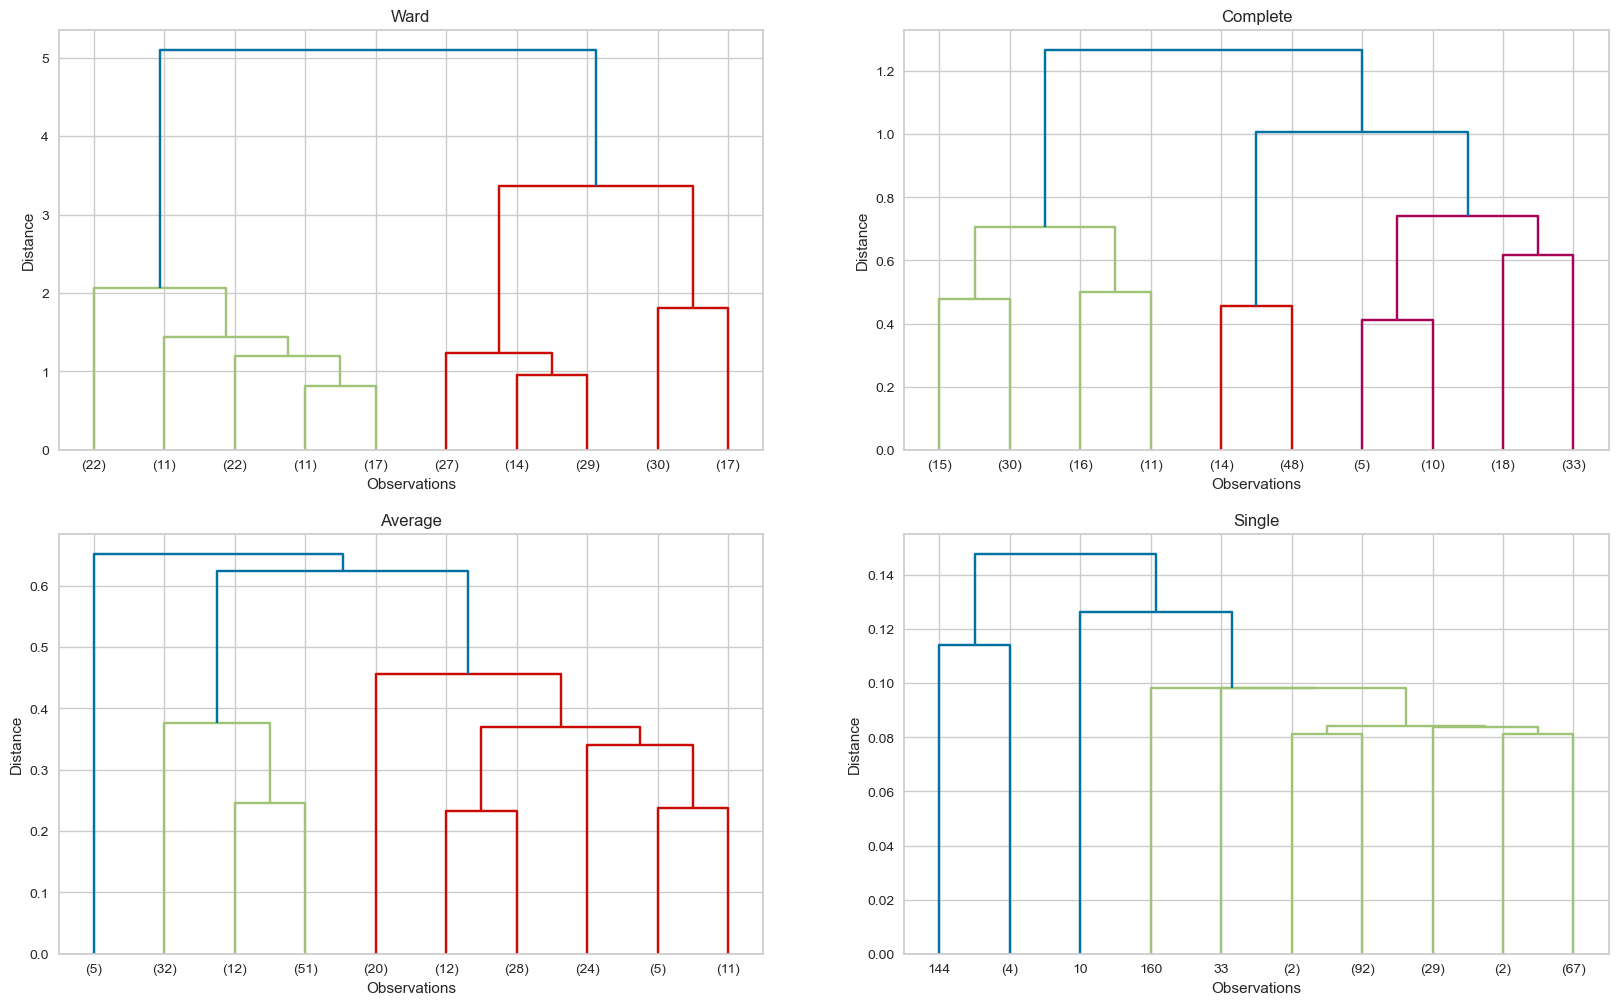

In [77]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

In [78]:
from sklearn.cluster import AgglomerativeClustering

In [79]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X1_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.41699937625242867
Silhouette Score for 3 clusters: 0.417124576652748
Silhouette Score for 4 clusters: 0.3898644314748176
Silhouette Score for 5 clusters: 0.37668241046330797
Silhouette Score for 6 clusters: 0.39920932010291066
Silhouette Score for 7 clusters: 0.3589298217276204
Silhouette Score for 8 clusters: 0.3611306861915168
Silhouette Score for 9 clusters: 0.3657953810746083


### Clustering based on Annual Income and Spending Score- x2

In [80]:
hc_ward = linkage(y=X2_scaled, method="ward")
hc_complete = linkage(X2_scaled, "complete")
hc_average = linkage(X2_scaled, "average")
hc_single = linkage(X2_scaled, "single")

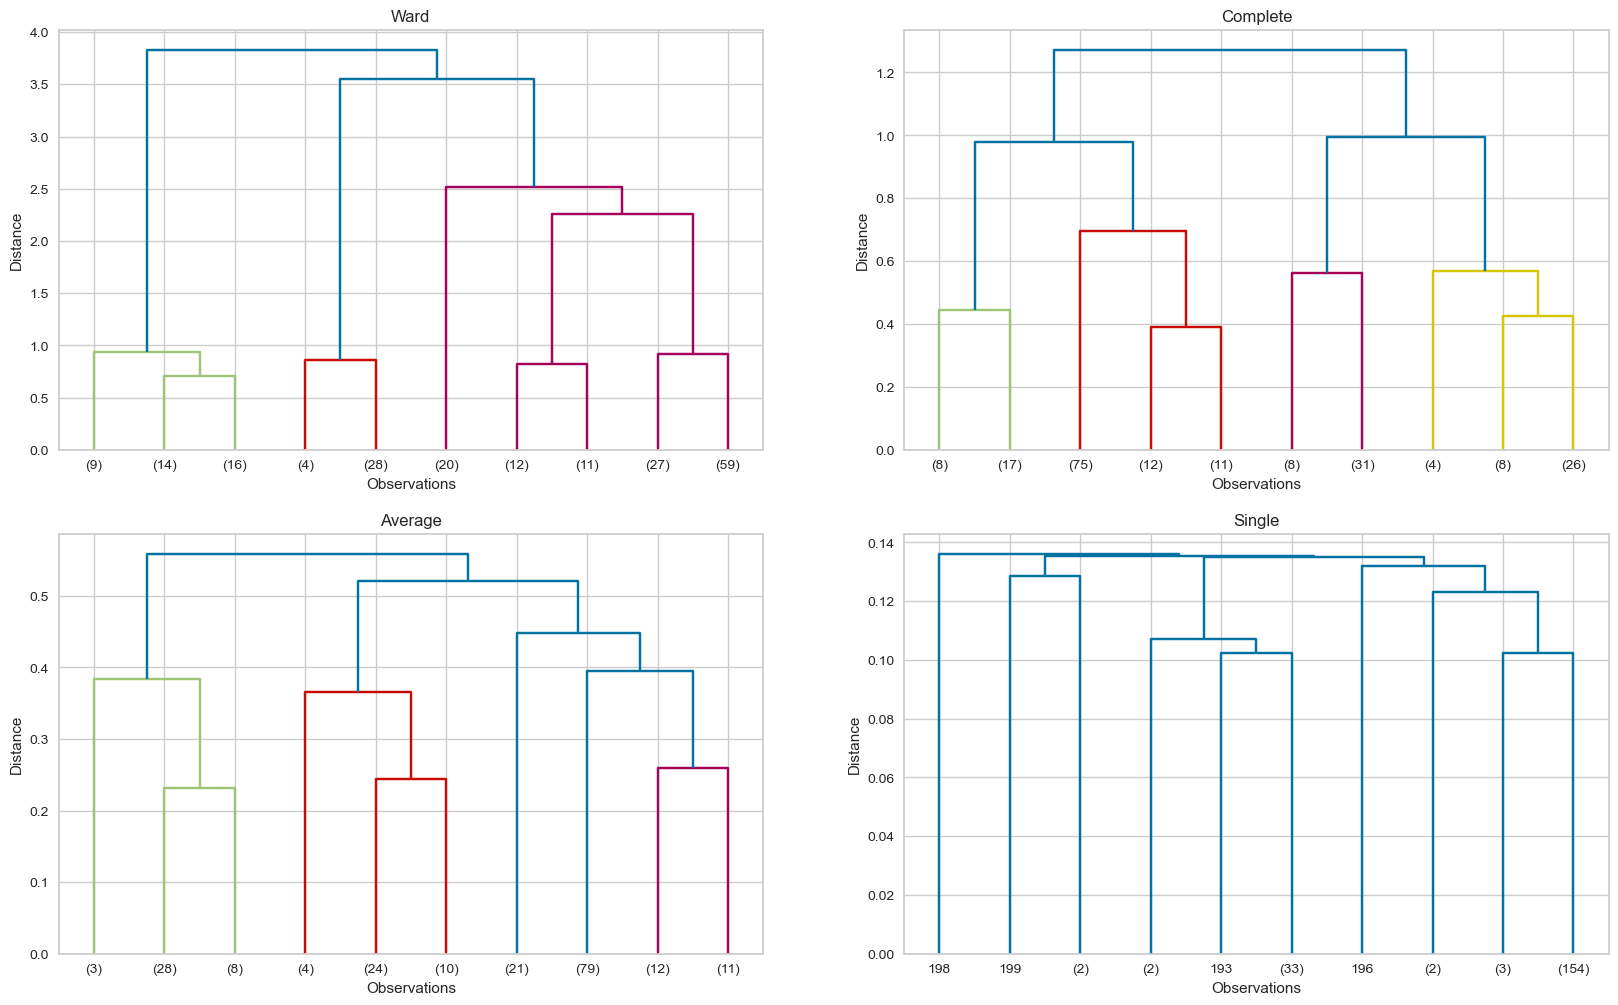

In [81]:
plt.figure(figsize=(20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size=10, truncate_mode='lastp', p=10);

In [82]:
from sklearn.cluster import AgglomerativeClustering

In [83]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters=k)
    model.fit_predict(X2_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1_scaled, model.labels_)}')

Silhouette Score for 2 clusters: 0.20050932290470005
Silhouette Score for 3 clusters: 0.09748244339847081
Silhouette Score for 4 clusters: 0.09968915553706402
Silhouette Score for 5 clusters: 0.07926762641458081
Silhouette Score for 6 clusters: 0.009742937391517558
Silhouette Score for 7 clusters: -0.01578319535216046
Silhouette Score for 8 clusters: -0.07689491772384643
Silhouette Score for 9 clusters: -0.08216970610394875


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [84]:
model = AgglomerativeClustering(n_clusters=6,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X1_scaled)

In [85]:
X1.drop(columns=['predicted_clusters'], inplace=True)
X1["clusters"] = clusters
X1.head()

,age,spending_score,clusters
0,19,39,4
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,4


#### Annual Income and Spending Score- x2

In [86]:
model = AgglomerativeClustering(n_clusters=5,
                                metric="euclidean",
                                linkage="ward")
clusters = model.fit_predict(X2_scaled)

In [87]:
X2.drop(columns=['predicted_clusters'], inplace=True)
X2["clusters"] = clusters
X2.head()

,annual_income,spending_score,clusters
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


### iii. *Visualizing and Labeling All the Clusters*

#### Age and Spending Score- x1

<Figure size 2000x1000 with 0 Axes>

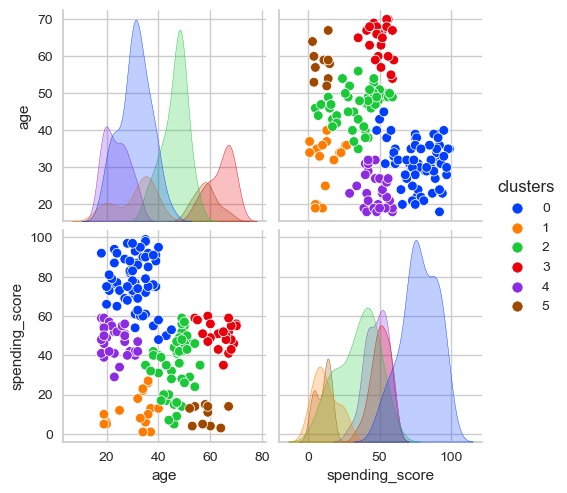

In [88]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X1, hue="clusters", palette="bright");

In [89]:
X1.groupby('clusters')[['age', 'spending_score']].agg(['mean', 'min', 'max']).sort_values(by=('age', 'mean'), ascending=True)

age         spending_score        
               mean min max           mean min max
clusters                                          
4         23.766667  18  32      47.600000  29  59
0         30.942857  18  45      77.828571  48  99
1         31.000000  19  40      12.117647   1  27
2         46.340000  35  56      34.640000   5  59
5         58.272727  52  67      10.181818   3  15
3         63.909091  54  70      50.636364  35  60

#### Annual Income and Spending Score- x2

<Figure size 2000x1000 with 0 Axes>

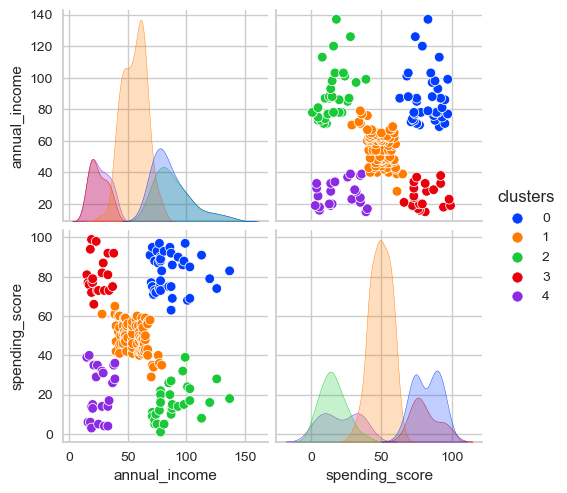

In [90]:
plt.figure(figsize = (20,10))
sns.pairplot(data=X2, hue="clusters", palette="bright");

#### Interpretation based on Age and Spending Score- x1

### Conclusion

I ran two clustering analyses to segment customers based on customer age and spending score: K-means and Hierarchical Clustering.
Although two models suggest 6 clusters, K-means solution is better clustered and more interpretable


**cluster 0** : Young-to-mid-aged / high spender customers. These customers generate a high proportion of the company revenue. 
Special promotions can be devised to keep these customers loyal.

**cluster 1**: Mid-aged-to-older / low spender customers. 

**cluster 2**: Young-to-mid-aged / medium spender customers.
    
**cluster 3**: Mid-aged (38-56) / medium spender customers.

**cluster 4**: Young-to-mid-aged / low spender customers.

**cluster 5**: Older (57-70) / medium spender customers.


#### Interpretation based on Annual Income and Spending Score- x2

## Conclusion

Both K-means and Hiearchical Clustering models provide consistent solutions with 5 segments.
The company needs to adop different strategies for each segment. 

**cluster 0**: High earner / High spender customers. We need to keep these customers spending.

**cluster 1**: Medium earner / Medium spender customers. How can we get these segment to spend more? This is a likely target group. 

**cluster 2**: Low earner / High spender customers. We also need to keep these segment spending. 

**cluster 3**: High earner / Low spender customers. This is a likely target group. How can we get these segment to spend more? We need more data to compare this group to high earner/high spender group so that we can address their specific needs. 

**cluster 4**: Low earner / Low spender customers. This group has limited income. While not a primary target group, we still can compare this group to low earner/high spender group to get this group to spend more. 


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___